In [2]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn

### 글꼴 설정

In [3]:
import matplotlib.font_manager as fm
[(f.name , f.fname) for f in fm.fontManager.ttflist if 'Goth' in f.name]

[('Franklin Gothic Heavy', 'C:\\Windows\\Fonts\\FRAHV.TTF'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf'),
 ('MJemokGothic', 'C:\\Windows\\Fonts\\MK.TTF'),
 ('Franklin Gothic Book', 'C:\\Windows\\Fonts\\FRABKIT.TTF'),
 ('MS Gothic', 'C:\\Windows\\Fonts\\msgothic.ttc'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHIC.TTF'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICI.TTF'),
 ('Franklin Gothic Book', 'C:\\Windows\\Fonts\\FRABK.TTF'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicBold.ttf'),
 ('Copperplate Gothic Light', 'C:\\Windows\\Fonts\\COPRGTL.TTF'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICBI.TTF'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADM.TTF'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framdit.ttf'),
 ('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADMIT.TTF'),
 ('Franklin Gothic Demi Cond',

In [4]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14, 4)

In [5]:
train = pd.read_csv('train.csv')
Test = pd.read_csv("test.csv")
# 필요한 데이터인 train과 test를 import 합니다.

combine = [train, Test]
combined = pd.concat(combine)
# 데이터의 전체적 상황을 보기위해 concat으로 합쳐서 보기로 했습니다.

### 데이터 살펴보기

In [6]:
print(train.shape)  # 데이터들의 모양입니다. 
print(Test.shape)   # 데스트는 컴럼값 하나가 모자란것으로 목표로하는 생존자를 예측하는 것이라 할 수 있겠습니다. 

(891, 12)
(418, 11)


In [7]:
combined.info()
# 두개를 합친 데이터는 현재 cabin, age, survived 데이터가 부족한 상황인데, survived의 경우 test데이터가 합쳐져 있기 떄문에 
# 부족하게 된 것으로 보입니다. 그리고 현재 사용할 수 없는 데이터로는 cabin, embarked,name, ticket 등이 object 티입이기 때문에
# 분석을 이용하기는 어려울 것으로 보입니다. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
combined.corr()
# combined 의 상호 연관성을 살펴 보았을 때 survived와 가장 연관있는 데이터는 Fare와 마이너스 값의 Pclass 인것으로 보입니다.
# age나 id, name, sipsp와 같은 경우는 거의 관계가 없는것으로 보이는데 그것이 정말 관련이 없는지 있는지를 조금이라도 살펴보고 사용하기
# 위해 그래프를 통해 나타내 보며 알아보도록 하겠습니다. 

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


Text(0.5, 1.0, '타이타닉 탑승자들은 어느 항구에서 가장 많이 탑승했나?')

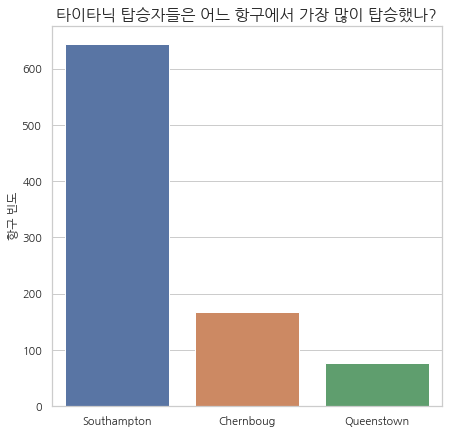

In [9]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Embarked"].value_counts().index, y = train["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('항구 빈도')
embarked_bar.set_title('타이타닉 탑승자들은 어느 항구에서 가장 많이 탑승했나?', fontsize = 16)

탑승자가 가장 많은곳은 사우스햄턴. 퀸즈타운이 가장 적었다. 그렇다면 항구간 생존률에 차이가 있을까?

Text(0.5, 1.0, '특정 항구에서 탄 탑승자들 간의 생존률은?')

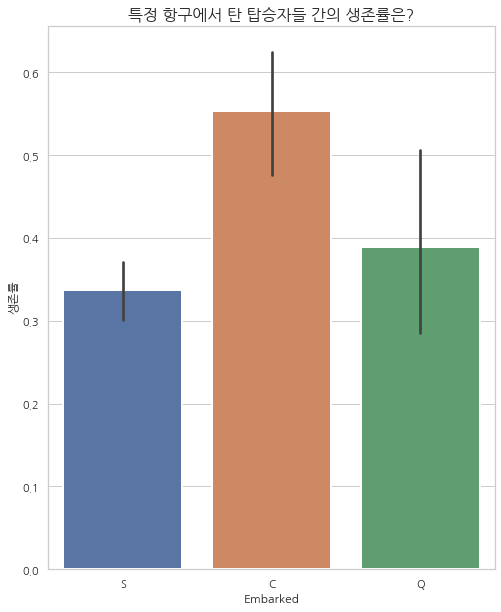

In [10]:
figure, embarked_sur = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = embarked_sur,
            linewidth=2)
embarked_sur.set_ylabel('생존률')
embarked_sur.set_title('특정 항구에서 탄 탑승자들 간의 생존률은?', fontsize = 16)

크렌버그에서 탄 탑승객들의 생존률이 가장 높았다. 크렌버그에는 어떤 비밀이 있는 것인지 다른 지표들을 가져와서 비교해 보도록 하겠다.

Text(0.5, 1.0, '특정 항구에서 탄 탑승자들 간의 평균 요금 차이는?')

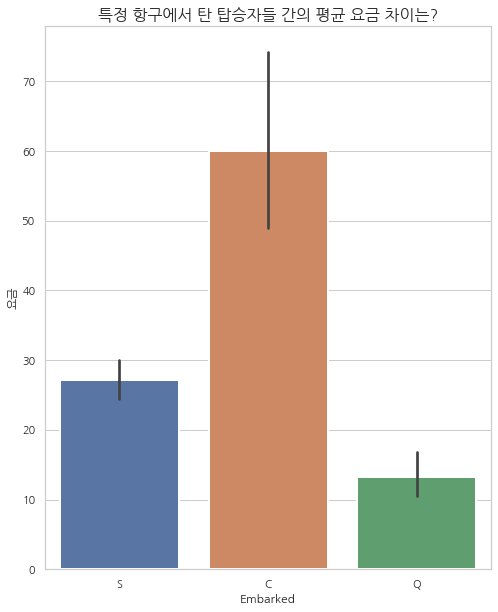

In [11]:
figure, embarked_fare = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Fare", 
            estimator = np.mean,
            data=train, 
            ax = embarked_fare,
            linewidth=2)
embarked_fare.set_ylabel('요금')
embarked_fare.set_title('특정 항구에서 탄 탑승자들 간의 평균 요금 차이는?', fontsize = 16)

#### 요금을 가져와 비교해 보니 탑승객의 수가 5배 정도 차이가 나던 크렌버그가 사우스 햄턴에 두배가 넘는 요금을 지불하고 탑승한 것으로 나타났다. 퀸스타운은 원래도 탑승한 인원수가 적었기 때문에 생존률에서도 조금만 생존해도 생존률이 올라갈 것이라는 점을 고려하면 요금은 낮은것으로 나타났다. 먼저 퀸즈타운의 비밀을 알아보고 그 다음으로 그렇다면 요금별 생존자 수를 알아보도록 하겠다.

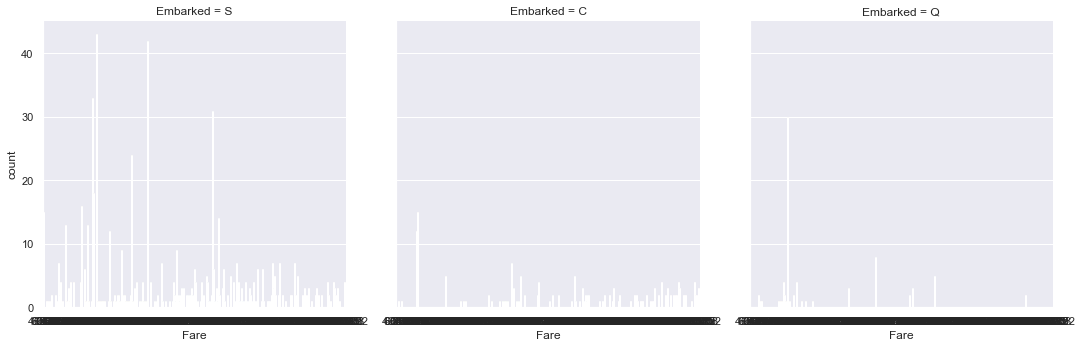

In [41]:
sns.set(font_scale=1)
g = sns.catplot(x="Fare", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

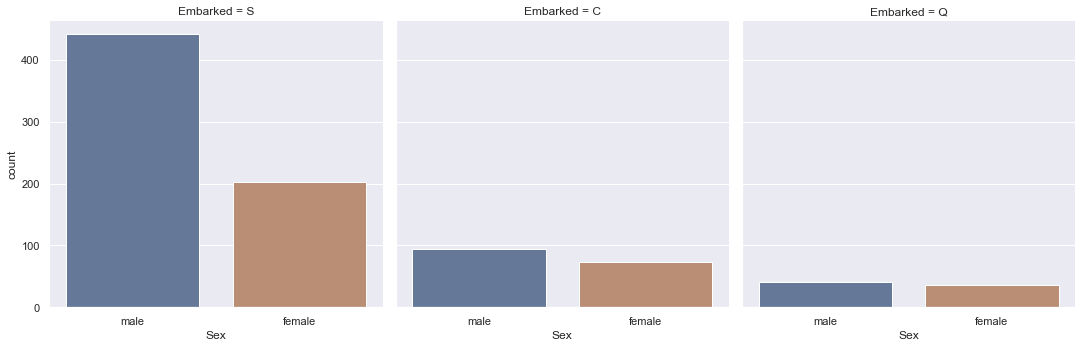

In [42]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

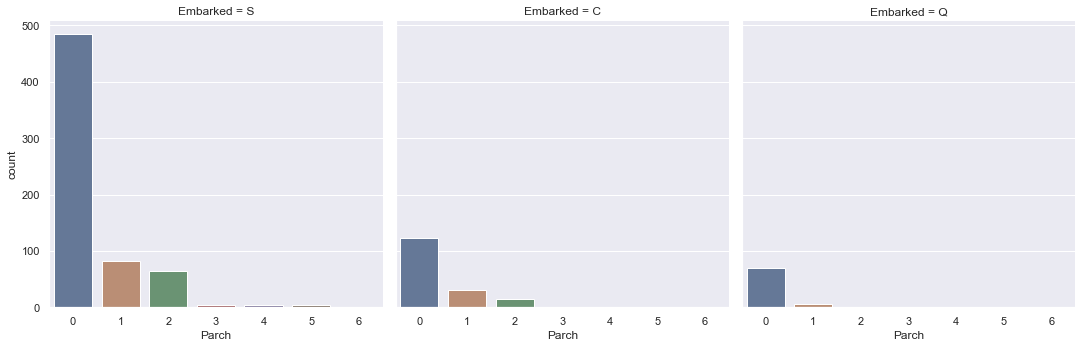

In [43]:
sns.set(font_scale=1)
g = sns.catplot(x="Parch", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

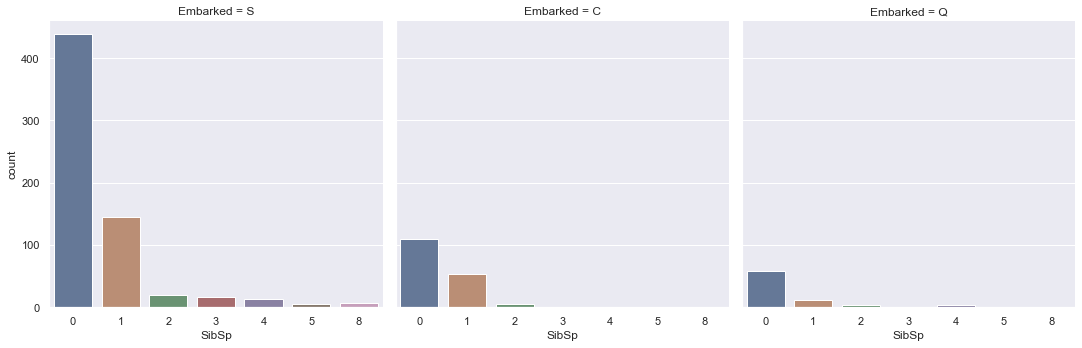

In [45]:
sns.set(font_scale=1)
g = sns.catplot(x="SibSp", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

### 위의 네가지 도표로 봤을때 내릴 수 있는 결론은 퀸스타운에서 탄 사람들은 가족이 없었다!!!
### 가족들의 여부가 이들의 생존에 영향을 끼친 것으로 보인다. 그들은 혈혈단신 이었기 
### 때문에 홀로 생존 할 수 있었던 것으로 보인다. 다음으로 요금과 생존률 간의 관계에 대해 알아보자

Text(0.5, 1.0, '생존률과 요금간의 관계는?')

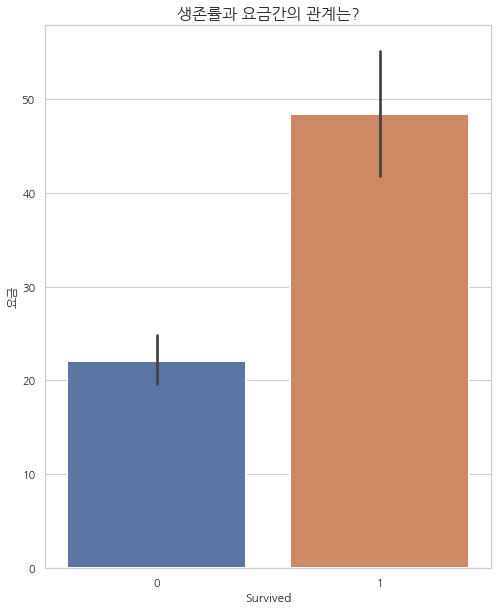

In [12]:
figure, fare_surv = plt.subplots(figsize = (8,10))
sns.barplot(x = "Survived", 
            y = "Fare", 
            estimator = np.mean,
            data=train, 
            ax = fare_surv,
            linewidth=2)
fare_surv.set_ylabel('요금')
fare_surv.set_title('생존률과 요금간의 관계는?', fontsize = 16)

### 이럴수가!! 요금을 더 많이 지불한 사람들의 생존률이 두배 가까이 되었다!!!!!(두둥)
### 굉장히 자본주의적 결과가 아닐수 없다. 요금에 관해 다른 지표들과 비교한다면 그 연관성을 자세히 볼수 있을 것 같다. 

### 다른 지표인 연령과 요금이 어떠한 관계가 있는지 살펴보자

Text(0.5, 1.0, '연령과 요금간의 관계는?')

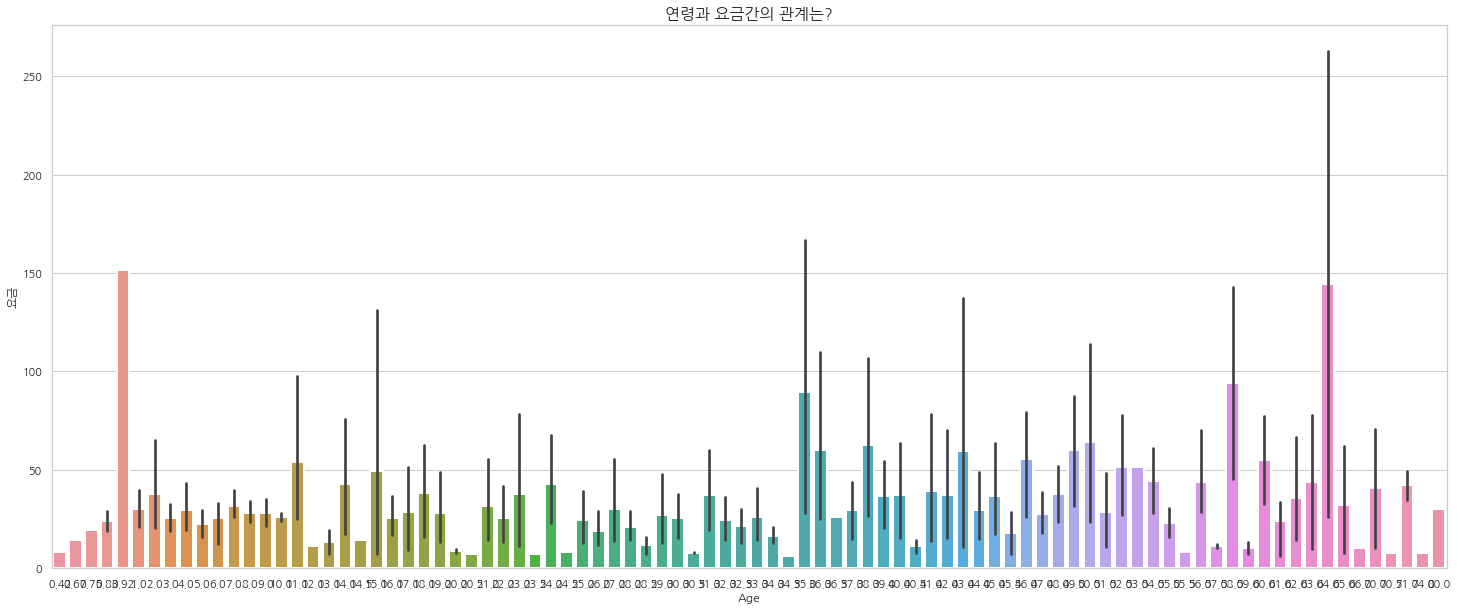

In [15]:
figure, fare_age = plt.subplots(figsize = (25,10))
sns.barplot(x = "Age", 
            y = "Fare", 
            estimator = np.mean,
            data=train, 
            ax = fare_age,
            linewidth=2)
fare_age.set_ylabel('요금')
fare_age.set_title('연령과 요금간의 관계는?', fontsize = 16)

### 초반과 후반에 굉장히 큰 값들이 존재하지만 그다지 상관 관계는 없는것으로 보인다.
### 그러나 전반적으로 나이가 많을수록 평균 요금이 높은것으로 보인다.
### 마지막으로 성별과 생존의 관계에 대해서 알아보도록 하겠다.

Text(0, 0.5, '생존률')

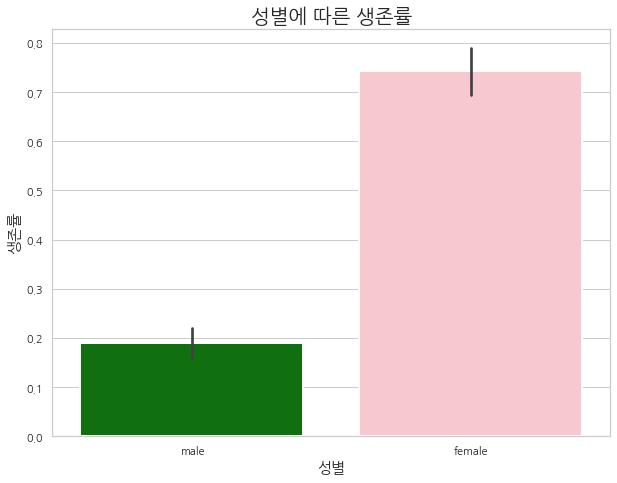

In [14]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))


sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)

myaxis.set_title("성별에 따른 생존률", fontsize = 20)
myaxis.set_xlabel("성별",fontsize = 15)
myaxis.set_ylabel("생존률", fontsize = 15)

성별간 생존률은 압도적으로 여성이 더 많은 것으로 나왔다. 유럽의 사회 분의기가 옛날이나 지금이나 여성이나 어린이 노약자 같은 사회적
약자들을 더 배려한다는 것으로 보인다. 이제 전처리를 통해 예측할 준비를 해보도록 하겠습니다.

### train 데이터 셋

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.info()  # train 데이터중 결측값이 있는 컬럼은 나이, 객실번호, 탑승항구 정도이다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [28]:
columns = ['PassengerId', 'Name', 'Cabin'] 
train = train.drop(columns, axis=1)
train.head()
# 그 중에서 정말 분석에 영향이 없을 것 같은 id와 이름은 지우는 것으로 하고, 객실 넘버와 티켓은 모두 다른 수일 것이고 분석하기 어려울것 같아 
# 지우는 것으로 하겠습니다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### object 컬럼들을 one hot encodin하기

In [29]:
train = pd.get_dummies(train,columns=['Sex'])
# 먼저 성별에 대해서 더미를 만들어 one hot encoding 하였습니다.
train.head() # 아래와 같이 숫자로만 표기 되는 것을 볼수 있습니다.

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [30]:
train = pd.get_dummies(train,columns=['Embarked'])
# 두번째로 탑승항구를 one-hot encoding 해보겠습니다.
train.head() # 아래와 깉이 원 핫 인코딩 되었습니다. 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [47]:
train_tic = pd.get_dummies(train,columns=['Ticket'])
train_tic.head() # Ticket을 나누어 보았으나 그렇게 큰 의미가 있어 보이지 않아 보류해 보겠습니다. 
# cabin의 경우도 ticket과 같이 종류가 많고, 또한 nan값이 많기 때문에 하지 않기로 하고 진행하겠습니다. 

,Survived,Pclass,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,Ticket_112053,Ticket_112058,Ticket_112059,Ticket_112277,Ticket_112379,Ticket_113028,Ticket_113043,Ticket_113050,Ticket_113051,Ticket_113055,Ticket_113056,Ticket_113059,Ticket_113501,Ticket_113503,Ticket_113505,Ticket_113509,Ticket_113510,Ticket_113514,Ticket_113572,Ticket_113760,Ticket_113767,Ticket_113773,Ticket_113776,Ticket_113781,Ticket_113783,Ticket_113784,Ticket_113786,...,Ticket_SC/PARIS 2146,Ticket_SC/PARIS 2149,Ticket_SC/PARIS 2167,Ticket_SC/Paris 2123,Ticket_SC/Paris 2163,Ticket_SCO/W 1585,Ticket_SO/C 14885,Ticket_SOTON/O.Q. 3101305,Ticket_SOTON/O.Q. 3101306,Ticket_SOTON/O.Q. 3101307,Ticket_SOTON/O.Q. 3101310,Ticket_SOTON/O.Q. 3101311,Ticket_SOTON/O.Q. 3101312,Ticket_SOTON/O.Q. 392078,Ticket_SOTON/O.Q. 392087,Ticket_SOTON/O2 3101272,Ticket_SOTON/O2 3101287,Ticket_SOTON/OQ 3101316,Ticket_SOTON/OQ 3101317,Ticket_SOTON/OQ 392076,Ticket_SOTON/OQ 392082,Ticket_SOTON/OQ 392086,Ticket_SOTON/OQ 392089,Ticket_SOTON/OQ 392090,Ticket_STON/O 2. 3101269,Ticket_STON/O 2. 3101273,Ticket_STON/O 2. 3101274,Ticket_STON/O 2. 3101275,Ticket_STON/O 2. 3101280,Ticket_STON/O 2. 3101285,Ticket_STON/O 2. 3101286,Ticket_STON/O 2. 3101288,Ticket_STON/O 2. 3101289,Ticket_STON/O 2. 3101292,Ticket_STON/O 2. 3101293,Ticket_STON/O 2. 3101294,Ticket_STON/O2. 3101271,Ticket_STON/O2. 3101279,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,0,3,7.2500,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,71.2833,C85,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,7.9250,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,53.1000,C123,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,8.0500,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
train.info() # train 데이터 중 나이 컬럼에서 결측치가 보입니다. 이부분을 채워주고 가도록 하겠습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [33]:
from sklearn.preprocessing import Imputer
cat = ['Age']
imputer_cat = Imputer(strategy="most_frequent")
train[cat] = imputer_cat.fit_transform(train[cat])
# imputer는 strategy에 따라 결측값에 원하는 값을 넣어주는 함수 입니다. 여기서는 최빈값을 넣어주는 것으로 전략을 잡았습니다

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [34]:
train.info() # train에서의 전처리는 더이상 필요하지 않은 것으로 보입니다. 그래서 test 데이터 셋으로 넘어가겠습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


###  test 데이터 셋

In [35]:
Test.info()  # test 데이터 셋에서는 train 데이터에서 사용했던 age와 cabin,fare 에서의 결측치 값이 보입니다. cabin을 제외하고 \
#그 부분을 먼저 처리해 주고 나서 진행하도록 하겠습니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [79]:
columns = ['PassengerId', 'Name','Ticket', 'Cabin'] 
Test = Test.drop(columns, axis=1)
Test.head()     # train 데이터와 마찬가지로 위 컬럼을 드롭하겠습니다.

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [80]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


In [38]:
from sklearn.preprocessing import Imputer
cat = ['Age','Fare']
imputer_cat = Imputer(strategy="most_frequent")
Test[cat] = imputer_cat.fit_transform(Test[cat])
# imputer는 strategy에 따라 결측값에 원하는 값을 넣어주는 함수 입니다. 여기서는 최빈값을 넣어주는 것으로 전략을 잡았습니다

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
Test = pd.get_dummies(Test,columns=['Sex'])
Test.head() # train 과 같이 진행해 주었습니다.

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,330911,7.8292,Q,0,1
1,3,47.0,1,0,363272,7.0000,S,1,0
2,2,62.0,0,0,240276,9.6875,Q,0,1
3,3,27.0,0,0,315154,8.6625,S,0,1
4,3,22.0,1,1,3101298,12.2875,S,1,0


In [77]:
Test = pd.get_dummies(Test,columns=['Embarked'])
Test.head() # train 과 같이 진행해 주었습니다.

,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,330911,7.8292,0,1,0,1,0
1,3,47.0,1,0,363272,7.0000,1,0,0,0,1
2,2,62.0,0,0,240276,9.6875,0,1,0,1,0
3,3,27.0,0,0,315154,8.6625,0,1,0,0,1
4,3,22.0,1,1,3101298,12.2875,1,0,0,0,1


In [46]:
Test.info() # 결측치를 모두 메워 분석에 들어가 보겠습니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


## model 구축

In [51]:
from sklearn.model_selection import train_test_split
x_data = train.iloc[:,1:]
y_data = train.iloc[:,0:1]
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, random_state=0)    # 먼저 train 데이터 셋을 나눠서 최적 모델을 찾아보겠습니다.

#### 1. 의사결정나무

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [55]:
pred_tree = tree.predict(X_test); pred_tree

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [56]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.8712574850299402

0.8071748878923767

#### 2.SVM

In [57]:
from sklearn.svm import SVC 
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.8967065868263473

0.7174887892376681

#### 3. 뉴럴네트워크

In [59]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.8083832335329342

0.8071748878923767

#### 4. pipeline

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe0 = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [68]:
pipe0.fit(X_train, y_train).score(X_test, y_test)

0.7802690582959642

In [64]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA # 차원축소 
from sklearn.feature_selection import SelectKBest

In [69]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('univ_select', SelectKBest(k=10)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('features', feature_union))
estimators.append(('scaler', MinMaxScaler()))
estimators.append(("svm", SVC()))
pipe = Pipeline(estimators)

In [70]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.7802690582959642

#### 5. Standardization

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train).score(X_test, y_test)

In [71]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
# Scaling training and test data the same way
#X_test_scaled = scaler.fit(X_test).transform(X_test)
X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.7802690582959642

In [72]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.8071748878923767

#### 6. AdaBoost(Adaptive Boosting)

In [73]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.8116591928251121

#### 7. Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.852017937219731

### 가장 좋은 모델로 그래디언트 부스팅을 설정하여 진행하겠습니다.

In [81]:
y_pred_grad = gbm.predict(Test)

In [89]:
submi.columns= ['Survived']

In [90]:
submi

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [92]:
submi.to_csv('submission.csv')

 - 캐글 제출결과 5755등으로 굉장히 저조한 성적을 보였습니다. 50%가 안되는 49.9% 정도로 아직 갈길이 굉장히 먼 것 같습니다. 
 - 파라미터 다듬는 법을 조금 더 익히고, 모델을 다루는 법을 더 많이 공부해야 겠습니다. 
 - 맨 처음 강사분이 가르쳐 주셨던 머신러닝 부분에서 너무 대충하고 넘어가셨다고 개인적으로 강하게 생각했었고, 
 - 그 다음 강사분은 하둡 및 sql을 강의 하셨어서 이 부분에 대해 많은 것을 더 배워보고 싶었는데 그러질 못해서 답답했습니다.
 - 수업을 하신다고 하신다면 저는 찬성하는 입장입니다. 
 - 컴퓨터 상의 문제로 html이 만들어 지지 않습니다. 그래서 ipynb로 보내는 점 양해 부탁드립니다.
 - 제출한 후에 개인적으로 더 공부하는 시간을 가질 예정입니다. 등수가 더 오르도록 노력해보겠습니다. 감사합니다.